## Imports

In [17]:
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt

## Data generation

In [18]:
# Signal parameters
T = 1   # seconds
f = 1/T # Hz

# Correct sampling condition: m*T = Np*Ts. m and Np are coprime integers
# We will use N = K*Np
m = 3; Np = 25; Ts = m*T/Np # seconds

# Sampling frequency
fs = 1/Ts # Hz

# Number of data
K = 2; N = K*Np # K*Np periods wil be considered

# Time signals
t = np.linspace(0, (N-1)*Ts, N)

factSim = 100; NSim = N*factSim
tSim = np.linspace(0, (NSim-1)*Ts/factSim, NSim)

# Output signals
y = np.sin(2*np.pi*f*t) # sampled signal
ySim = np.sin(2*np.pi*f*tSim) # "continuous-time" signal

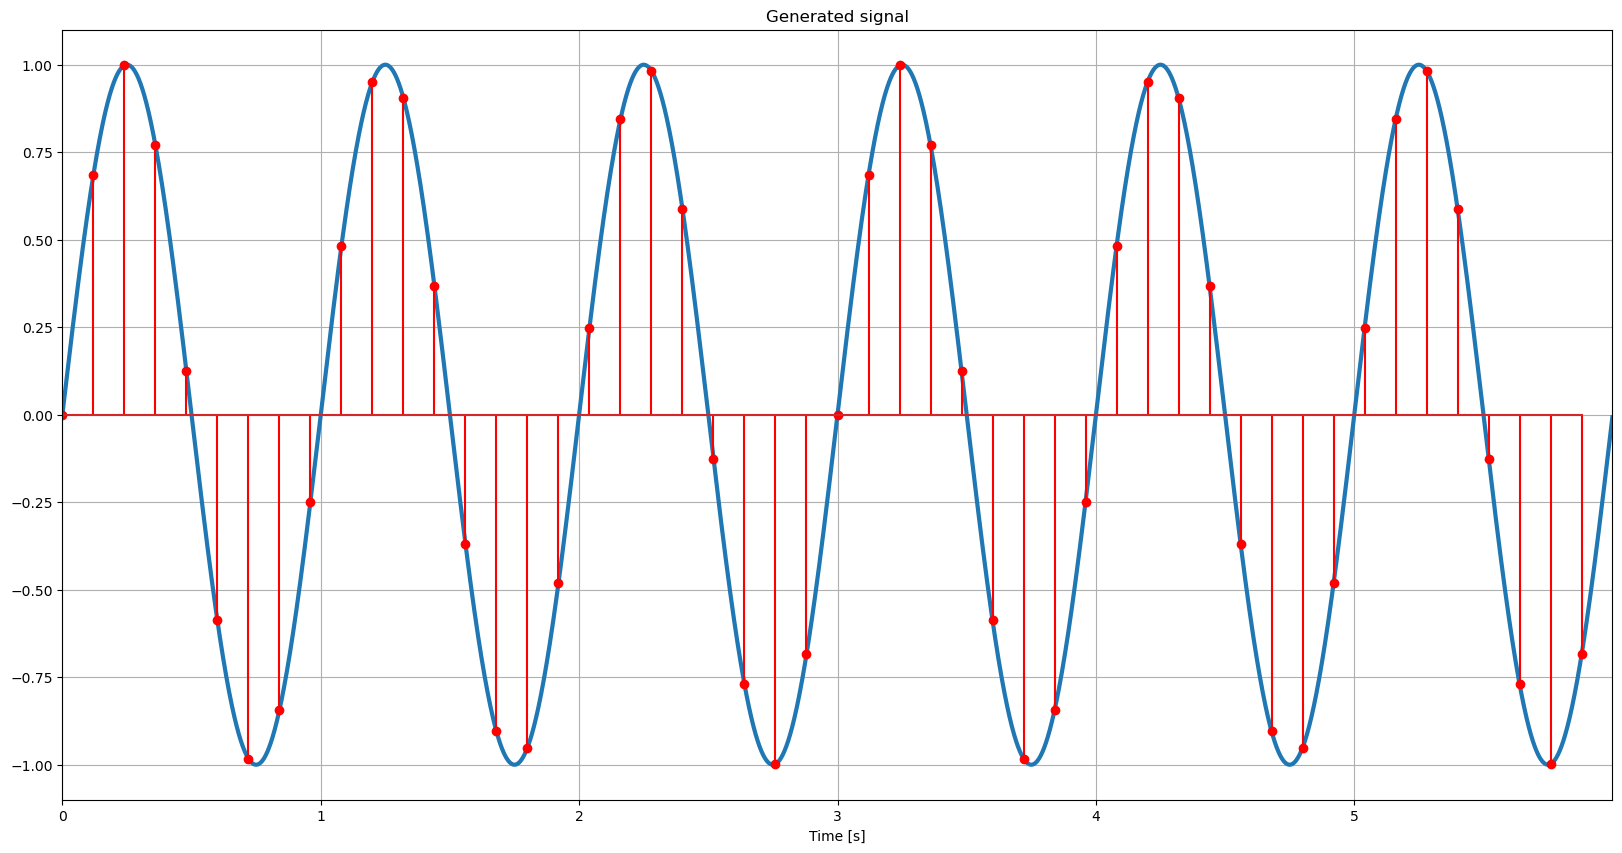

 
fs =  8.333333333333334 Hz
Ts =  0.12 s
 
N =  50
Nyquist condition is verified !
fN =  4.166666666666667 Hz
Spectral resolution =  0.16666666666666669 Hz
 
Number of periods of sinusoid at f = 6.0


In [22]:
plt.figure(figsize=(20,10))
plt.plot(tSim,ySim, linewidth = 3)
plt.stem(t,y,'r')
plt.grid()
plt.title('Generated signal')
plt.xlim([0,tSim[-1]])
plt.xlabel('Time [s]')
plt.show()

# print
print(' ')
print('fs = ', fs, 'Hz')
print("Ts = ", Ts, "s")
print(' ')
print("N = ", N)
fN = fs/2 # Nyquist frequency
if (fN > f):
    print('Nyquist condition is verified !')
else:
    print('Nyquist condition is NOT verified !')
print("fN = ", fN, "Hz")
print("Spectral resolution = ", fs/N, 'Hz')
print(' ')
print('Number of periods of sinusoid at f =', N*Ts*f)

## Spectrum computation

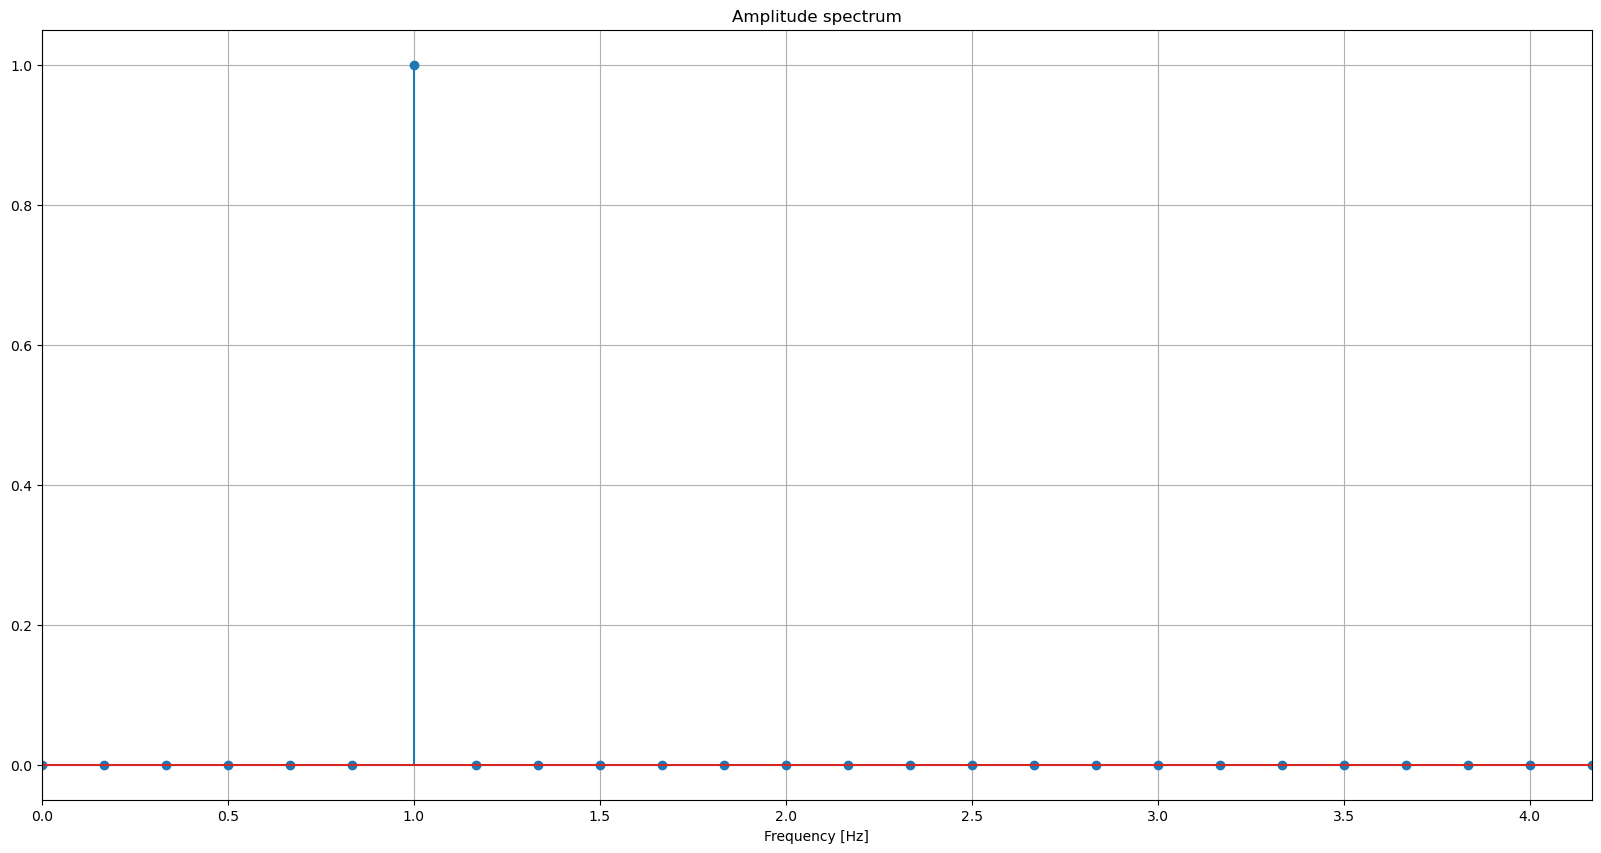

In [16]:
f = np.linspace(0, fN, N//2 + 1)

spectrum_y = fft(y)
spectrum_y[0] = spectrum_y[0]/2    
mag = (2/N)*np.abs(spectrum_y[0:N//2 + 1]);    

plt.figure(figsize=(20,10))
plt.title('Amplitude spectrum')
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.stem(f,mag)
plt.xlim([0,f[-1]])
plt.show()    